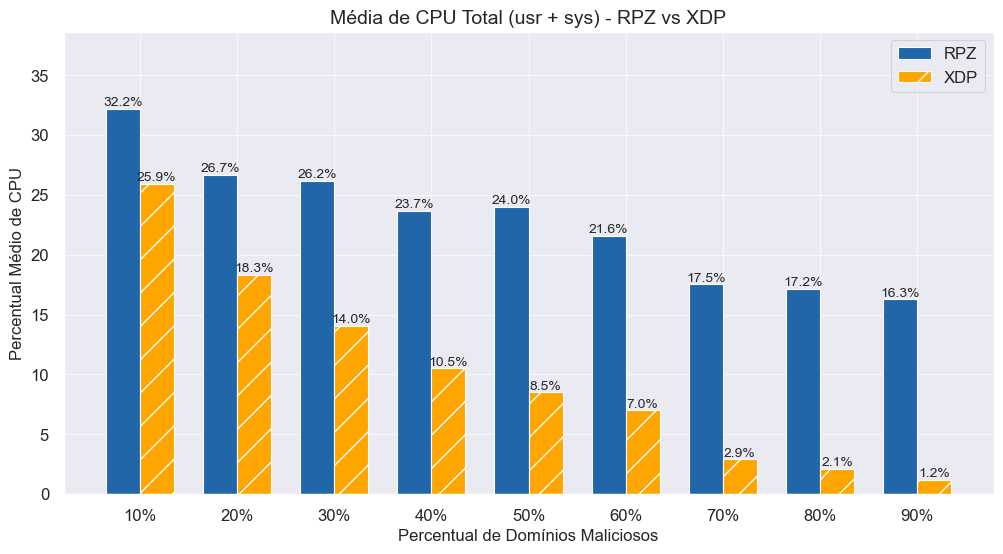

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
plt.style.use('seaborn-v0_8-paper')
sns.set_context("paper")
sns.set_style("darkgrid")

# processa arquivo CSV e calcula a média de CPU
def process_csv(filename):
    # Lê o arquivo CSV
    df = pd.read_csv(filename)
    
    # Cria uma cópia do DataFrame filtrado
    df_all = df[df['CPU'] == 'all'].copy()
    
    # Calcula as médias de usr e sys
    avg_usr = df_all['usr'].mean()
    avg_sys = df_all['sys'].mean()
    avg_total = avg_usr + avg_sys
    
    return {
        'total': avg_total
    }

#dir = 'results_20250112/teste1'
dir = 'results_20250415' # com cache ativado
#dir = 'results_20250416' # sem cache ativado


# Lista de arquivos para processar
files = {
    'rpz': {
        10: f'../../Python/{dir}/sar_output_dnsfw_rpz_10.csv',
        20: f'../../Python/{dir}/sar_output_dnsfw_rpz_20.csv',
        30: f'../../Python/{dir}/sar_output_dnsfw_rpz_30.csv',
        40: f'../../Python/{dir}/sar_output_dnsfw_rpz_40.csv',
        50: f'../../Python/{dir}/sar_output_dnsfw_rpz_50.csv',
        60: f'../../Python/{dir}/sar_output_dnsfw_rpz_60.csv',
        70: f'../../Python/{dir}/sar_output_dnsfw_rpz_70.csv',
        80: f'../../Python/{dir}/sar_output_dnsfw_rpz_80.csv',
        90: f'../../Python/{dir}/sar_output_dnsfw_rpz_90.csv'
    },
    'xdp': {
        10: f'../../Python/{dir}/sar_output_dnsfw_xdp_10.csv',
        20: f'../../Python/{dir}/sar_output_dnsfw_xdp_20.csv',
        30: f'../../Python/{dir}/sar_output_dnsfw_xdp_30.csv',
        40: f'../../Python/{dir}/sar_output_dnsfw_xdp_40.csv',
        50: f'../../Python/{dir}/sar_output_dnsfw_xdp_50.csv',
        60: f'../../Python/{dir}/sar_output_dnsfw_xdp_60.csv',
        70: f'../../Python/{dir}/sar_output_dnsfw_xdp_70.csv',
        80: f'../../Python/{dir}/sar_output_dnsfw_xdp_80.csv',
        90: f'../../Python/{dir}/sar_output_dnsfw_xdp_90.csv'
    }
}

# Processar todos os arquivos
results = {}
percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90]
plot_data = {
    'RPZ': [],
    'XDP': []
}

for system in files:
    for percent in files[system]:
        key = f"{system}_{percent}"
        results[key] = process_csv(files[system][percent])
        
        # Organizar dados para o plot
        sys_name = system.upper()
        plot_data[sys_name].append(results[key]['total'])

# Configuração do gráfico
plt.figure(figsize=(12, 6))

width = 0.35
x = range(len(percentages))

# Criar barras
bars1 = plt.bar([i - width/2 for i in x], plot_data['RPZ'], 
                width=width, label='RPZ', color='#2066A8')
bars2 = plt.bar([i + width/2 for i in x], plot_data['XDP'], 
                width=width, label='XDP', color='#FFA500', hatch='/')

# Função para adicionar rótulos nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10)

# Adicionar rótulos
add_value_labels(bars1)
add_value_labels(bars2)

plt.title('Média de CPU Total (usr + sys) - RPZ vs XDP', fontsize=14)
plt.xlabel('Percentual de Domínios Maliciosos', fontsize=12)
plt.ylabel('Percentual Médio de CPU', fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xticks(range(len(percentages)), [f'{p}%' for p in percentages])
plt.legend(fontsize=12)
plt.grid(True, linestyle='-', alpha=0.7)

# Ajustar limites do eixo Y
plt.ylim(0, max(max(plot_data['RPZ']), max(plot_data['XDP'])) * 1.2)

# Salvando com configurações completas
plt.savefig('cpu_bloqueio_media_total.png',
            dpi=300,              # resolução
            bbox_inches='tight',  # remove espaço em branco extra
            pad_inches=0.1,       # pequena margem
            format='png',         # formato do arquivo
            transparent=False,    # fundo não transparente
            facecolor='white',    # cor do fundo
            edgecolor='none',     # sem borda
            )

plt.show()

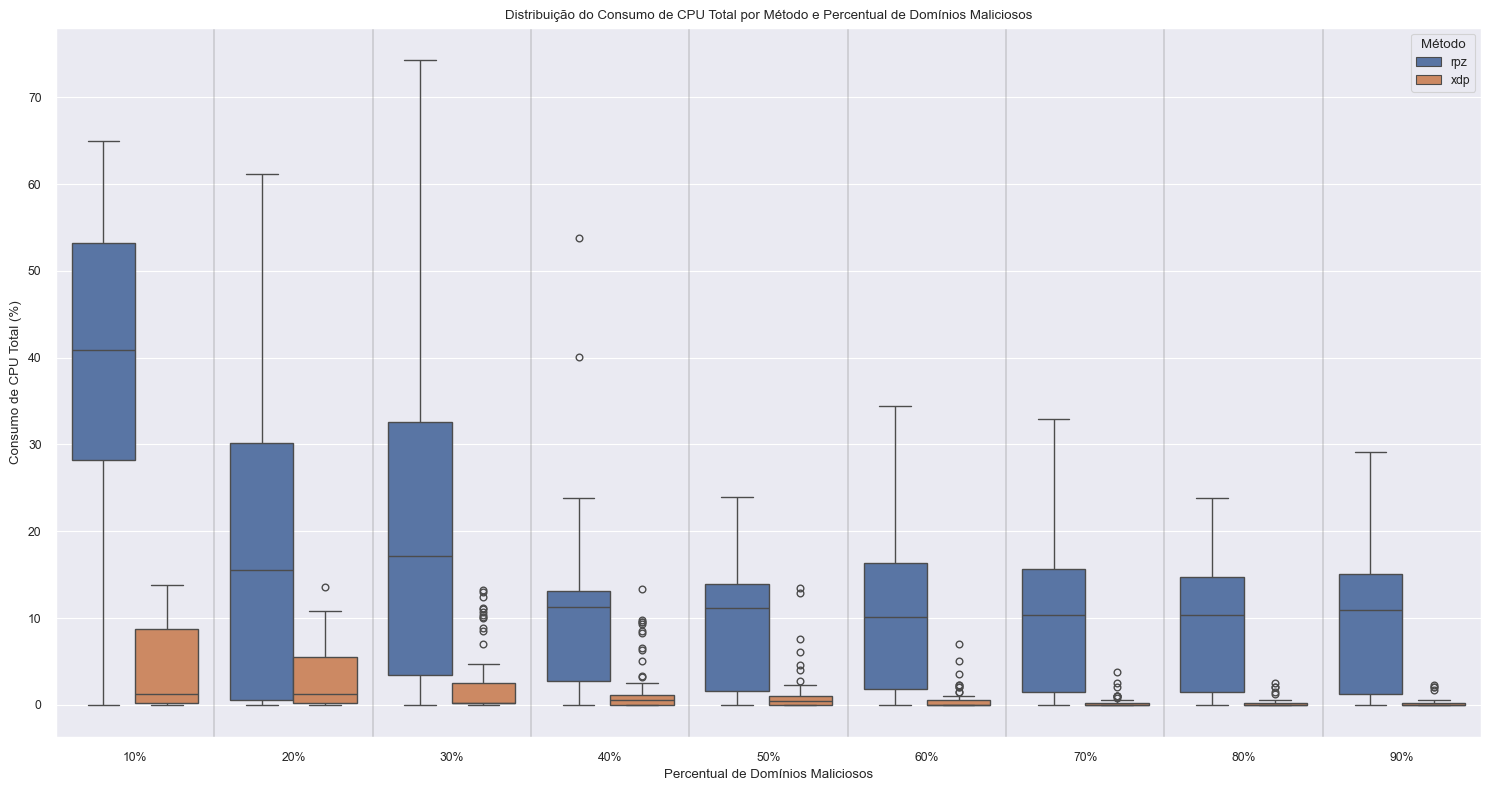

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
#plt.style.use('seaborn-v0_8-paper')
#sns.set_context("paper")
#sns.set_style("whitegrid")
#sns.color_palette("husl", 8)

# Função para processar um arquivo CSV e retornar o DataFrame com os dados de CPU
def process_csv(filename, method, percent):
    df = pd.read_csv(filename)
    df_all = df[df['CPU'] == 'all'].copy()
    df_all['total_cpu'] = df_all['usr'] + df_all['sys']
    df_all['method'] = method
    df_all['percent'] = f'{percent}%'
    return df_all

#dir = 'results_20250112/teste1'
dir = 'results_20250413'

# Lista de arquivos para processar
files = {
    'rpz': {
        10: f'../../Python/{dir}/sar_output_dnsfw_rpz_10.csv',
        20: f'../../Python/{dir}/sar_output_dnsfw_rpz_20.csv',
        30: f'../../Python/{dir}/sar_output_dnsfw_rpz_30.csv',
        40: f'../../Python/{dir}/sar_output_dnsfw_rpz_40.csv',
        50: f'../../Python/{dir}/sar_output_dnsfw_rpz_50.csv',
        60: f'../../Python/{dir}/sar_output_dnsfw_rpz_60.csv',
        70: f'../../Python/{dir}/sar_output_dnsfw_rpz_70.csv',
        80: f'../../Python/{dir}/sar_output_dnsfw_rpz_80.csv',
        90: f'../../Python/{dir}/sar_output_dnsfw_rpz_90.csv'
    },
    'xdp': {
        10: f'../../Python/{dir}/sar_output_dnsfw_xdp_10.csv',
        20: f'../../Python/{dir}/sar_output_dnsfw_xdp_20.csv',
        30: f'../../Python/{dir}/sar_output_dnsfw_xdp_30.csv',
        40: f'../../Python/{dir}/sar_output_dnsfw_xdp_40.csv',
        50: f'../../Python/{dir}/sar_output_dnsfw_xdp_50.csv',
        60: f'../../Python/{dir}/sar_output_dnsfw_xdp_60.csv',
        70: f'../../Python/{dir}/sar_output_dnsfw_xdp_70.csv',
        80: f'../../Python/{dir}/sar_output_dnsfw_xdp_80.csv',
        90: f'../../Python/{dir}/sar_output_dnsfw_xdp_90.csv'
    }
}

# Processar todos os arquivos e combinar em um único DataFrame
all_data = []
for method in files:
    for percent in files[method]:
        df = process_csv(files[method][percent], method, percent)
        all_data.append(df)

combined_df = pd.concat(all_data)

# Criar o gráfico
plt.figure(figsize=(15, 8))

# Criar boxplot
sns.boxplot(data=combined_df, x='percent', y='total_cpu', hue='method', palette="deep")

n_categories = len(combined_df['percent'].unique()) - 1  # número de separadores necessários
for i in range(n_categories):
    plt.axvline(x=i + 0.5, color='gray', linestyle='-', alpha=0.3)


plt.title('Distribuição do Consumo de CPU Total por Método e Percentual de Domínios Maliciosos')
plt.xlabel('Percentual de Domínios Maliciosos')
plt.ylabel('Consumo de CPU Total (%)')
plt.legend(title='Método')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=0)

# Ajustar layout
plt.tight_layout()

# Salvar o gráfico
plt.savefig('cpu_boxplot.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.1,
            format='png',
            transparent=False,
            facecolor='white',
            edgecolor='none')

plt.show()
